# Station-centric Analsysis
Converting buffers into geoseries.

In [1]:
# to read and wrangle data
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis0-yujee
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx


from descartes import PolygonPatch


from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

import folium
from folium.plugins import MarkerCluster
import pandas as pd


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


/tmp/ipykernel_9231/886088700.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df['buffer_polygon'].apply(wkt.loads)


<AxesSubplot:>

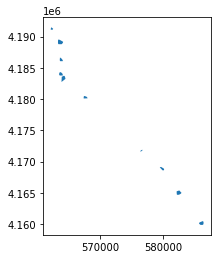

In [2]:
from shapely import wkt
stations=pd.read_csv('buffer_polygon.csv')

stationbounds=stations[['Station',
 'City',
 'Code',
 'TOD',
 'County',
 'Marker',
 'buffer_polygon']]


df=stationbounds
df['geometry'] = df['buffer_polygon'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:32610')
gdf.plot()


In [3]:
gdf.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
gdf_cr=ox.projection.project_gdf(gdf,to_crs='EPSG:4326')
gdf_cr = gdf_cr.to_crs(epsg=4326)
gdf_cr

,Station,City,Code,TOD,County,Marker,buffer_polygon,geometry
0,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...","POLYGON ((-122.27519 37.84423, -122.27886 37.8..."
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,"POLYGON ((563693.8852295046 4186061.965723997,...","POLYGON ((-122.27631 37.81974, -122.27785 37.8..."
2,HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((580092.9554610827 4168606.360613972,...","POLYGON ((-122.09192 37.66114, -122.09221 37.6..."
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((582418.4676641112 4164677.51896479, ...","POLYGON ((-122.06600 37.62552, -122.06785 37.6..."
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,"POLYGON ((567336.267085615 4180096.87365391, 5...","POLYGON ((-122.23548 37.76572, -122.23554 37.7..."
5,NORTH BERKELEY,Berkeley,BKY,No,ALA,o,"POLYGON ((562158.4961938841 4191096.300319521,...","POLYGON ((-122.29332 37.86522, -122.29466 37.8..."
6,19TH STREET/OAKLAND,Oakland,OAK,No,ALA,o,"POLYGON ((563608.8389169731 4183769.339677225,...","POLYGON ((-122.27748 37.79909, -122.27882 37.7..."
7,BAY FAIR,San Leandro,SAN,No,ALA,o,"POLYGON ((576458.9770771035 4171618.447772438,...","POLYGON ((-122.13281 37.68859, -122.13353 37.6..."
8,UNION CITY,Union City,UNC,No,ALA,o,"POLYGON ((586339.0999929304 4159876.292845242,...","POLYGON ((-122.02215 37.58189, -122.02477 37.5..."
9,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...","POLYGON ((-122.27561 37.78981, -122.27509 37.7..."


In [5]:
maps = folium.Map(location = [37.8,-121.870118961256], tiles = "CartoDB positron", zoom_start = 11)

for _, r in gdf_cr.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    geo_j = folium.GeoJson(data=gdf_cr,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Station']).add_to(geo_j)
    geo_j.add_to(maps)
maps

In [6]:
gdf_cr

,Station,City,Code,TOD,County,Marker,buffer_polygon,geometry
0,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...","POLYGON ((-122.27519 37.84423, -122.27886 37.8..."
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,"POLYGON ((563693.8852295046 4186061.965723997,...","POLYGON ((-122.27631 37.81974, -122.27785 37.8..."
2,HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((580092.9554610827 4168606.360613972,...","POLYGON ((-122.09192 37.66114, -122.09221 37.6..."
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((582418.4676641112 4164677.51896479, ...","POLYGON ((-122.06600 37.62552, -122.06785 37.6..."
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,"POLYGON ((567336.267085615 4180096.87365391, 5...","POLYGON ((-122.23548 37.76572, -122.23554 37.7..."
5,NORTH BERKELEY,Berkeley,BKY,No,ALA,o,"POLYGON ((562158.4961938841 4191096.300319521,...","POLYGON ((-122.29332 37.86522, -122.29466 37.8..."
6,19TH STREET/OAKLAND,Oakland,OAK,No,ALA,o,"POLYGON ((563608.8389169731 4183769.339677225,...","POLYGON ((-122.27748 37.79909, -122.27882 37.7..."
7,BAY FAIR,San Leandro,SAN,No,ALA,o,"POLYGON ((576458.9770771035 4171618.447772438,...","POLYGON ((-122.13281 37.68859, -122.13353 37.6..."
8,UNION CITY,Union City,UNC,No,ALA,o,"POLYGON ((586339.0999929304 4159876.292845242,...","POLYGON ((-122.02215 37.58189, -122.02477 37.5..."
9,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...","POLYGON ((-122.27561 37.78981, -122.27509 37.7..."


In [7]:
gdf_cr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Station         10 non-null     object  
 1   City            10 non-null     object  
 2   Code            10 non-null     object  
 3   TOD             10 non-null     object  
 4   County          10 non-null     object  
 5   Marker          10 non-null     object  
 6   buffer_polygon  10 non-null     object  
 7   geometry        10 non-null     geometry
dtypes: geometry(1), object(7)
memory usage: 768.0+ bytes


In [8]:
gdf_cr.to_file('stationarea.geojson', driver='GeoJSON')